# Módulo 1 - Introdução à Visão Computacional

Este notebook inaugura a *Especialização em Visão Computacional*, introduzindo os conceitos fundamentais de Visão Computacional, a biblioteca OpenCV e técnicas de manipulação de imagens. Ao longo deste módulo, exploraremos os fundamentos do processamento de imagens utilizando a biblioteca OpenCV. Começaremos importando as bibliotecas necessárias, incluindo OpenCV (`cv2`).


Antes de executar este *notebook*, certifique-se que você seguiu as recomendações iniciais e executou o [Jupyter Botebook inicial](./00_Configuracao_Inicial.ipynb).

![Imagens](img/m01.png)

Este notebook faz parte do programa da [Especialização em Visão Computacional](https://escola.sigmoidal.ai/especializacao-em-visao-computacional).


## 1.1 - Conhecendo a biblioteca OpenCV

OpenCV é uma biblioteca de programação em C++ com capacidades em tempo real. Como é escrita em C/C++ otimizado, a biblioteca pode se beneficiar do processamento multi-core. Uma introdução teórica sobre a biblioteca OpenCV é realizada na próxima seção.

A biblioteca OpenCV é popular por várias razões, incluindo:

- É uma biblioteca de visão computacional de código aberto
- É uma biblioteca específica para processamento de imagens
- Possui mais de 2.500 algoritmos otimizados, incluindo algoritmos de visão computacional de última geração
- Suporte para aprendizado de máquina e aprendizado profundo
- Possui interfaces para C++, Python, Java e MATLAB
- A biblioteca suporta Windows, Linux, Android e macOS

### 1.1.1 - Módulos do OpenCV

O OpenCV é dividido em vários módulos. Cada módulo pode ser entendido, em geral, como sendo dedicado a um grupo de problemas de visão computacional. Os principais módulos são brevemente descritos aqui.

<center>
    <img src="img/modulos-opencv.png">
</center>

- `core`: *Funcionalidade principal*. Este módulo define estruturas de dados básicas e também funções básicas usadas por todos os outros módulos na biblioteca.
- `imgproc`: *Processamento de imagens*. Um módulo de processamento de imagens que inclui filtragem de imagens, transformações geométricas de imagens, conversão de espaço de cores e histogramas.
- `imgcodecs`: *Codecs de imagem*. Leitura e escrita de arquivos de imagem.
- `videoio`: *E/S de vídeo*. Uma interface para captura de vídeo e codecs de vídeo.
- `highgui`: *GUI de alto nível*. Uma interface para capacidades de interface do usuário. Ele fornece uma interface para fazer facilmente o seguinte:
    - Criar e manipular janelas que podem exibir/mostrar imagens
    - Adicionar barras de rastreamento às janelas, comandos de teclado e manipular eventos do mouse
- `video`: *Análise de vídeo*. Um módulo de análise de vídeo incluindo algoritmos de subtração de fundo, estimativa de movimento e rastreamento de objetos.
- `calib3d`: *Calibração de câmera e reconstrução 3D*. Este módulo cobre algoritmos básicos de geometria de múltiplas visões, algoritmos de correspondência estéreo, estimativa de pose de objetos, calibração de uma única câmera e estéreo, e também reconstrução 3D.
- `features2d`: *Framework de recursos 2D*. Este módulo inclui detectores de recursos, descritores e correspondentes de descritores.
- `objdetect`: *Detecção de objetos*. Detecção de objetos e instâncias de classes pré-definidas (por exemplo, rostos, olhos, pessoas e carros).
- `dnn`: *Módulo de rede neural profunda (DNN)*. Este módulo contém o seguinte:
    - API para criação de novas camadas
    - Conjunto de camadas úteis integradas
    - API para construir e modificar redes neurais a partir de camadas
    - Funcionalidade para carregar modelos de redes serializadas de diferentes frameworks de aprendizado profundo
- `ml`: *Aprendizado de máquina*. A Biblioteca de Aprendizado de Máquina (MLL) é um conjunto de classes e métodos que podem ser usados para fins de classificação, regressão e agrupamento.
- `flann`: *Agrupamento e pesquisa em espaços multidimensionais*. Fast Library for Approximate Nearest Neighbors (FLANN) é uma coleção de algoritmos que são altamente adequados para pesquisas rápidas de vizinhos mais próximos.
- `photo`: *Fotografia computacional*. Este módulo implementa um pipeline de junção que realiza a junção automática de imagens panorâmicas.
- `stitching`: *Junção de imagens*. Este módulo implementa um pipeline de junção que realiza a junção automática de imagens panorâmicas.
- `shape`: *Distância e correspondência de formas*. Este módulo pode ser usado para correspondência de formas, recuperação ou comparação.
- `superres`: *Super-resolução*. Este módulo contém um conjunto de classes e métodos que podem ser usados para aprimoramento de resolução.
- `videostab`: *Estabilização de vídeo*. Este módulo contém um conjunto de classes e métodos para estabilização de vídeo.
- `viz`: *Visualizador 3D*. Este módulo é usado para exibir widgets que fornecem vários métodos para interagir com cenas e widgets.

## 1.2 - Manipulando arquivos e imagens com OpenCV

Primeiramente, abordaremos como carregar imagens do disco usando a função `imread` do OpenCV, seguida por uma explanação detalhada sobre os parâmetros e retornos desta função. Vamos examinar a estrutura da imagem carregada em detalhe, com foco na intensidade dos pixels e nas propriedades da imagem, como tipo de pixel e dimensões.

Depois disso, discutiremos as várias formas de visualizar as imagens carregadas. Veremos por que o método `plt.imshow()` do `matplotlib` é mais adequado para o ambiente do notebook Jupyter, em comparação com a função `cv2.imshow()` do OpenCV (mais adequado quando formos rodar *scripts*, por exemplo). Além disso, vamos destacar algumas particularidades sobre a representação de imagens em tons de cinza.

Por fim, iniciaremos a manipulação dos pixels da imagem, o que representa um passo crucial no processamento de imagens. Ao longo deste notebook, usaremos exemplos práticos para ilustrar esses conceitos, oferecendo uma compreensão abrangente e prática sobre como lidar com imagens utilizando OpenCV e Python.


In [ ]:
# Importar os pacotes necessários
import cv2
import numpy as np
from typing import Optional
import matplotlib.pyplot as plt

%matplotlib inline


### 1.2.1 - Carregando Imagens com OpenCV

Vamos começar lendo uma imagem do disco usando a função `imread` do OpenCV. A sintaxe para isso em Python e C++ é a seguinte:

Esses comandos abaixo carregam a imagem especificada do disco para a memória. No caso do Python, a imagem é armazenada como um objeto NumPy multidimensional, enquanto no C++ ela é armazenada como um objeto `Mat`.

#### <font style="color:rgb(0, 0, 128)">Sintaxe da Função</font>

``` python
cv2.imread(
    filename: str,
    flags: Optional[int] = None
) -> np.ndarray
```

**Parâmetros**<br>
`filename` é o caminho do arquivo do arquivo que será carregado (relativo ou absoluto). Este argumento é **obrigatório**.<br>
`flags` são sinalizadores (*flag*) opcionais que pode assumir valores de `cv2.ImreadModes`. Veja alguns exemplos comuns de `flags`:


* **cv2.IMREAD_GRAYSCALE** (ou 0): Carrega a imagem em modo de escala de cinza.
* **cv2.IMREAD_COLOR** (ou 1): Carrega uma imagem colorida. Qualquer transparência da imagem será ignorada. Este é o sinalizador padrão.
* **cv2.IMREAD_UNCHANGED** (ou -1): Carrega a imagem como tal, incluindo o canal alfa.

A função `imread` retorna uma matriz multi-dimensional que contém os valores de intensidade de pixel da imagem. Para obter uma compreensão completa da função `imread` e suas diversas opções, você pode consultar a [documentação oficial do OpenCV](https://docs.opencv.org/4.7.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56).



In [ ]:
letra_c = cv2.imread("data/c_cinza.png", cv2.IMREAD_GRAYSCALE)
print(letra_c)

[[255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]]


Os valores acima dizem respeito à intensidade de cada *pixel*. No caso, 0 representa os pontos pretos da imagem e 255 os brancos.

In [ ]:
type(letra_c)

numpy.ndarray

**Propriedades Dimensionais de Imagens**

Em OpenCV, as dimensões de uma imagem são representadas como uma tupla na forma $ \text{largura} \times \text{altura} $ ou, equivalentemente, $ \text{\# de colunas} \times \text{\# de linhas} $. Por outro lado, no NumPy, o método `shape` retorna as dimensões da imagem como uma tupla na ordem inversa, isto é, $ \text{altura} \times \text{largura} $.

Isso evidencia a necessidade de atenção ao manipular as dimensões das imagens, dada a diferença nas convenções adotadas por cada biblioteca.


In [ ]:
print("Tipo (pixels): {}\n".format(letra_c.dtype))
print("Tipo (objeto): {}\n".format(type(letra_c.dtype)))
print("Dimensões: {}\n".format(letra_c.shape))

Tipo (pixels): uint8

Tipo (objeto): <class 'numpy.dtypes.UInt8DType'>

Dimensões: (15, 15)



### 1.2.2 - Visualizando Imagens

Quando estamos lidando com tarefas de processamento e visualização de imagens, existem várias opções para exibir imagens. A escolha do método de visualização frequentemente depende do ambiente em que estamos trabalhando - seja um notebook Jupyter ou um script Python executado em uma IDE.

A função `cv2.imshow()` do OpenCV, embora útil, pode causar problemas em um notebook Jupyter, pois pode travar o kernel e interromper a execução do notebook.

Por isso, para o ambiente de um notebook Jupyter, é mais adequado usar o método `plt.imshow()` do `matplotlib`. Este método lê e representa graficamente um array NumPy, tornando-o uma opção conveniente para visualização de imagens.

Se você estiver usando o Google Colab, há ainda outra opção: você pode usar `from google.colab.patches import cv2_imshow` para exibir imagens com a função `cv2_imshow()`

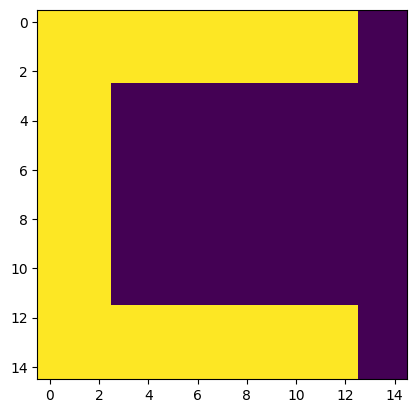

In [ ]:
# Exibir a imagem com matplotlib
plt.imshow(letra_c);

**Importante:** Uma das particularidades que precisamos lidar ao trabalhar com imagens é a questão da escala de cores. No nosso caso, carregamos a imagem em tons de cinza, porém é crucial entender que a biblioteca matplotlib, responsável por exibir as imagens em nosso notebook, não assume automaticamente que deva utilizar um mapa de cores em tons de cinza para a representação da imagem.

Por padrão, o matplotlib usa uma escala de cores chamada `viridi`, que é uma escala de cores de percepção uniforme. Portanto, mesmo que carreguemos uma imagem em tons de cinza, a menos que especifiquemos explicitamente usando `cmap='gray'`.

Para resolver este problema, precisamos informar ao matplotlib para usar o mapa de cores em tons de cinza ao exibir nossa imagem. Isso pode ser feito com o seguinte comando: `matplotlib.rc('image', cmap='gray')`.

Este comando deve ser incluído no início do notebook. Ao fazer isso, estamos configurando o matplotlib para usar o mapa de cores em tons de cinza por padrão ao exibir imagens. Dessa forma, qualquer imagem carregada posteriormente em tons de cinza será exibida corretamente, sem a necessidade de especificar o mapa de cores a cada vez. Isso facilita o processo de visualização e assegura que as cores da imagem sejam representadas corretamente.

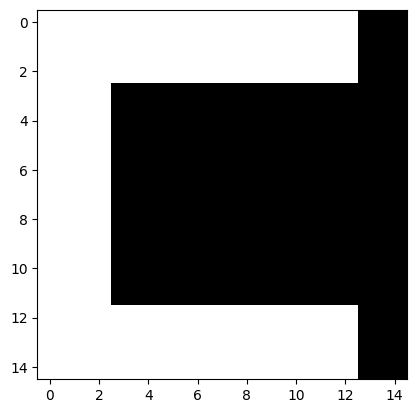

In [ ]:
plt.imshow(letra_c, cmap='gray');

### 1.2.3 - Manipulando Pixels

Agora que já vimos como carregar e visualizar uma imagem, vamos avançar para a manipulação dos pixels. Como mencionado anteriormente, uma imagem é composta por uma matriz de pixels, cada um com seu valor de intensidade.

Vamos explorar como acessar, modificar e manipular esses pixels para realizar alterações desejadas na imagem. Também abordaremos a importante ideia de Região de Interesse (ROI), que representa uma sub-região da imagem que queremos processar.

Podemos acessar um pixel específico de uma imagem simplesmente indexando a matriz da imagem. Por exemplo, `img[0, 0]` nos daria o pixel no canto superior esquerdo. Se a imagem for colorida, obteríamos um array de três elementos representando os canais vermelho, verde e azul, respectivamente. Em uma imagem em tons de cinza, obteríamos um único valor representando a intensidade do pixel.

Da mesma forma, podemos modificar um pixel atribuindo um novo valor à sua posição na matriz da imagem.

In [ ]:
# Acessando o valor do pixel localizado na primeira linha e terceira coluna
valor_pixel_original = letra_c[0, 2]
print("Valor original do pixel na 1ª linha e 3ª coluna:", valor_pixel_original)

# Modificando o valor do pixel na primeira linha e terceira coluna para 0
letra_c[0, 2] = 0

# Acessando e exibindo o novo valor do pixel modificado
valor_pixel_modificado = letra_c[0, 2]
print("Valor do pixel na 1ª linha e 3ª coluna após modificação:", valor_pixel_modificado)

Valor original do pixel na 1ª linha e 3ª coluna: 255
Valor do pixel na 1ª linha e 3ª coluna após modificação: 0


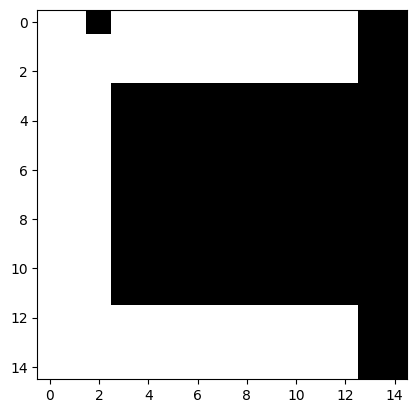

In [ ]:
plt.imshow(letra_c, cmap='gray');

Em muitos casos, talvez queiramos trabalhar com uma sub-região da imagem, também conhecida como Região de Interesse (ROI). Podemos facilmente definir uma ROI em uma imagem utilizando a ` de matrizes, da mesma forma que faríamos com uma matriz numpy padrão.

In [ ]:
# Definindo uma ROI
roi = letra_c[0:10, 0:5]

# Exibindo a ROI
print(roi)

[[255 255   0 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]]


Text(0.5, 1.0, 'ROI')

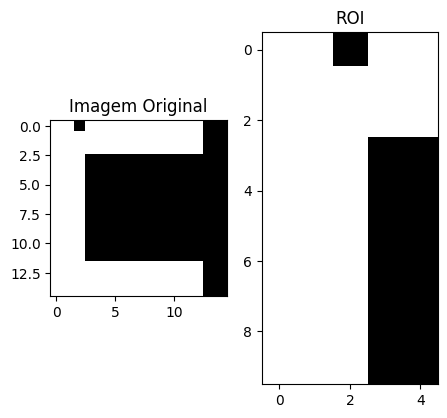

In [ ]:
# Criando uma nova figura para exibir as imagens
plt.figure(figsize=[5, 5])

# Exibindo a imagem original
plt.subplot(121)
plt.imshow(letra_c, cmap='gray')
plt.title('Imagem Original')

# Exibindo a imagem com contraste ajustado
plt.subplot(122)
plt.imshow(roi, cmap='gray')
plt.title('ROI')

Quando exibimos uma ROI, talvez queiramos que ela seja exibida na mesma escala da imagem original. No entanto, o matplotlib não mantém automaticamente a escala original ao exibir a ROI. Para corrigir isso, podemos calcular a escala da ROI em relação à imagem original e usar essa escala para definir o tamanho da figura quando exibimos a ROI.

Text(0.5, 1.0, 'ROI')

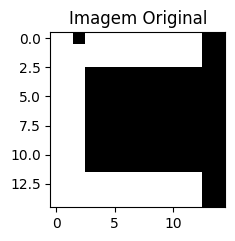

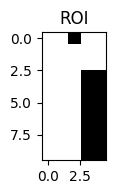

In [ ]:
# Obter as dimensões da imagem original e do ROI
h_original, w_original = letra_c.shape[:2]
h_roi, w_roi = roi.shape[:2]

# Definir o tamanho da figura com base nas dimensões das imagens
figsize_original = (5, 5) # por exemplo
scale = min(h_roi / h_original, w_roi / w_original) # escala do ROI em relação à imagem original
figsize_roi = (figsize_original[0] * scale, figsize_original[1] * scale)

# Criar as figuras
plt.figure(figsize=figsize_original)

# Exibir a imagem original
plt.subplot(211)
plt.imshow(letra_c, cmap='gray')
plt.title('Imagem Original')

# Criar uma nova figura para o ROI com o tamanho ajustado
plt.figure(figsize=figsize_roi)

# Exibir o ROI
plt.imshow(roi, cmap='gray')
plt.title('ROI')

### 1.2.4 - Salvando Imagens com OpenCV

Depois de manipular uma imagem usando o OpenCV, geralmente queremos salvar o resultado. Isso pode ser feito usando a função `imwrite` do OpenCV. A sintaxe para essa função em Python e C++ é a seguinte:

Esses comandos abaixo salvam a imagem especificada da memória para o disco. No caso do Python, a imagem é um objeto NumPy multidimensional, enquanto no C++ ela é um objeto `Mat`.

#### <font style="color:rgb(0, 0, 128)">Sintaxe da Função</font>

``` python
cv2.imwrite(
    filename: str,
    img: np.ndarray,
    params: Optional[List[int]] = None
) -> bool
```

**Parâmetros**<br>
`filename` é o nome do arquivo para o qual a imagem será salva. Este argumento é **obrigatório**.<br>
`img` é a imagem a ser salva. Este argumento é **obrigatório**.<br>
`params` é uma sequência opcional de pares (propriedade/valor) para especificar formato de compressão. Para o formato de imagem JPEG, a sequência pode ser por exemplo: `[cv2.IMWRITE_JPEG_QUALITY, 90]` para especificar a qualidade do JPEG (o padrão é 95).

A função `imwrite` retorna um booleano. Se o arquivo for salvo com sucesso, a função retorna `True`. Se ocorrer um erro ao salvar o arquivo, a função retorna `False`.

Para obter uma compreensão completa da função `imwrite` e suas diversas opções, você pode consultar a [documentação oficial do OpenCV](https://docs.opencv.org/4.7.0/d4/da8/group__imgcodecs.html#ga292d81be8d76901bff7988d18d2b42ac).


In [ ]:
# salva o arquivo na pasta data
cv2.imwrite('data/c_cinza_roi.png', roi)

True

Vamos agora carregar essa nova imagem manipulada e ver como o resultado foi armazenado no arquivo `c_cinza_roi.png`

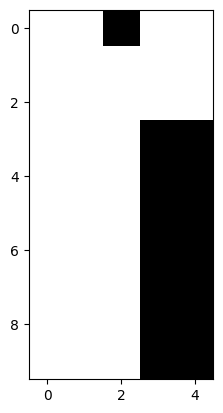

In [ ]:
img_manipulada = cv2.imread('data/c_cinza_roi.png', 0)
plt.imshow(img_manipulada, cmap='gray');

## 1.3 - Transformações Geométricas

Redimensionar imagens também é necessário ao se trabalhar com Visão Computacional.Isso pode ser feito de forma simples, como colocamos abaixo. Se você quiser saber um pouco mais sobre *interpolation*, vamos deixar aqui um [link](https://www.cambridgeincolour.com/tutorials/image-interpolation.htm) de referência sobre o assunto.

### 1.3.1 - Escala

A primeira manipulação que faremos nesse sentido é a mudança de escala. Isso é útil para que aumentar ou diminuir o tamanho de uma imagem. A função `cv2.resize` é utilizada para redimensionar a imagem para as dimensões desejadas. No caso `resized_image = cv2.resize(image, (2000, 300), interpolation=cv2.INTER_LINEAR)`, a imagem é redimensionada para uma largura de 2000 pixels e altura de 300 pixels usando uma interpolação linear.

- Aumentar a imagem
	- Geralmente, a melhor abordagem é cv2.INTER_CUBIC ou CV2.INTER_LINEAR
- Diminuir a imagem
	- Geralmente, a melhor abordagem é usar cv2.INTER_LINEAR

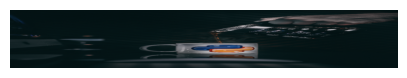

In [18]:
# carregar a imagem
image = cv2.imread('../data/cafe.png')

# redimensionar a imagem para 2000 x 300 pixels
resized_image = cv2.resize(image, (2000, 300), interpolation=cv2.INTER_LINEAR)

# plotar a imagem
sig.plot_image(resized_image)

### 1.3.2 - Escala com ratio

O ajuste de `ratio` de uma imagem é uma transformação geométrica que altera as dimensões da imagem mantendo sua proporção. O código `cv2.resize(image, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)` utiliza a função `resize` da biblioteca OpenCV para redimensionar a imagem pelo fator de escala `fx` e `fy` para 30% do tamanho original, tanto na largura quanto na altura.

A `interpolation` especificada como `cv2.INTER_LINEAR` assegura uma transição suave dos pixels ao alterar o tamanho da imagem. A função `sig.plot_image(dst_image)` é então chamada para exibir a imagem redimensionada.


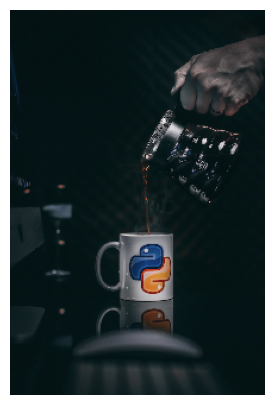

In [19]:
# redimensionar a imagem usando ratio de 0.3
dst_image = cv2.resize(image, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)
sig.plot_image(dst_image)

### 1.3.3 - Translação

A translação é um tipo de transformação geométrica que desloca uma imagem em uma direção específica dentro do espaço bidimensional. Utilizando OpenCV, podemos aplicar a translação por meio de uma matriz de transformação que define a quantidade de deslocamento nos eixos x (horizontal) e y (vertical).

Por exemplo, `M = np.float32([[1, 0, tx], [0, 1, ty]])` cria uma matriz de translação onde `tx` e `ty` são, respectivamente, as distâncias de deslocamento nos eixos x e y. A aplicação dessa transformação é feita através da função `cv2.warpAffine(image, M, (width, height))`, que irá efetivamente mover a imagem para a nova posição. Esse processo é essencial em muitas tarefas de visão computacional, como alinhamento de imagens e correção de panoramas.


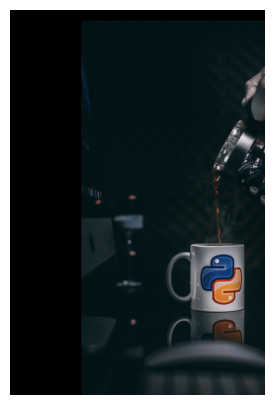

In [20]:
# realizar translação da imagem
height, width = image.shape[:2]
M = np.float32([[1, 0, 200], [0, 1, 30]])
dst_image = cv2.warpAffine(image, M, (width, height))
sig.plot_image(dst_image)

### 1.3.4 - Rotação

A rotação de uma imagem é uma transformação geométrica que altera a orientação da imagem girando-a em torno de um ponto central. No trecho de código fornecido, `cv2.getRotationMatrix2D` é utilizado para criar uma matriz de rotação. Essa função recebe como parâmetros o centro da imagem `(width / 2.0, height / 2.0)`, o ângulo de rotação `180` graus, e o fator de escala `1`. Com essa matriz, `cv2.warpAffine` aplica a transformação à imagem original, resultando em `dst_image` que é a imagem rotacionada em 180 graus. A imagem resultante é então apresentada utilizando `sig


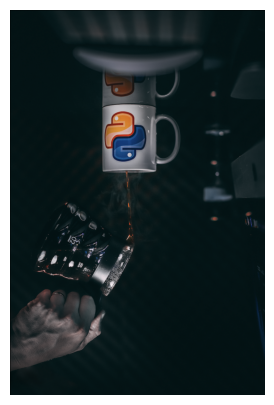

In [21]:
# realizar rotação da imagem
height, width = image.shape[:2]
M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), 180, 1)
dst_image = cv2.warpAffine(image, M, (width, height))
sig.plot_image(dst_image)

## 1.4 - Anotações em Imagens

O primeiro passo para começarmos a trabalhar com imagens é carregar as bibliotecas. Aqui, vamos usar algumas velhas conhecidas, e também o OpenCV.

### 1.4.1 Características das Imagens

Para ler imagens, vamos armazenar a mesma em uma variável, e carregar com `cv2.imread`. Esse processo é parecido com a forma que carregamos datasets em csv.

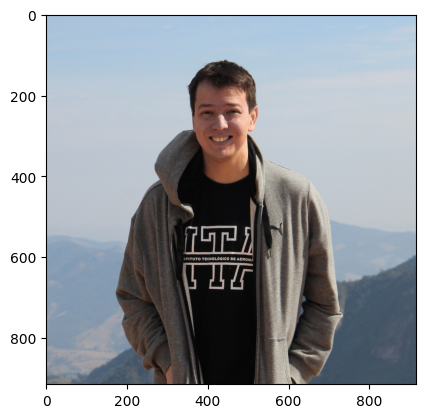

In [22]:
# importando as bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sigmoidal as sig

# ler imagem
img = cv2.imread("../data/carlos.jpg")

# visualizando a imagem
plt.imshow(img[...,::-1])

Temos que lembrar que uma imagem é um array de pixels, distribuídos em canais. Por isso recebemos esses 3 números abaixo.

Portanto, lemos que a nossa imagem tem 915 pixels de altura e de largura, e 3 canais.

In [5]:
# verificando as dimensões da imagem
print(f'Dimensões da imagem: {img.shape}')

Dimensões da imagem: (915, 915, 3)


### 1.4.2 - Acessando pixels específicos

Ao acessar um pixel específico de uma imagem usando OpenCV em Python, o resultado é um array do NumPy que representa os valores dos canais de cor naquele pixel. No seu exemplo, `img[20, 20]` está acessando o pixel na linha 20 e coluna 20 da imagem.

Enquanto isso, `dtype=uint8` indica que cada valor do canal de cor é representado por um inteiro sem sinal de 8 bits, que é o padrão para imagens em muitos sistemas de processamento de imagem. Isso significa que cada canal pode ter um valor no intervalo de 0 a 255.

In [11]:
# Acessando o valor do pixel na posição (20, 20)
print(f'{img[20, 20]=}')


img[20, 20]=array([220, 195, 169], dtype=uint8)


### 1.4.3 - Desenhando um Retângulo

Assim como fazemos com datasets em CSV, é interessante criar cópias para fazer manipulações, por isso, vamos criar uma cópia da nossa imagem antes das manipulações. As alterações feitas no OpenCV são feitas como que se fosse `inplace`. Por isso, é vital que tenhamos uma cópia, para que tenhamos esse checkpoint.

A primeira coisas que vamos fazer é desenhar um retângulo. Para isso, vamos usar a função `rectangle`, que toma como argumentos a imagem que será manipulada, o ponto de início, ponto de término, cor do retângulo e grossura do mesmo. Com isso, temos o resultado abaixo.

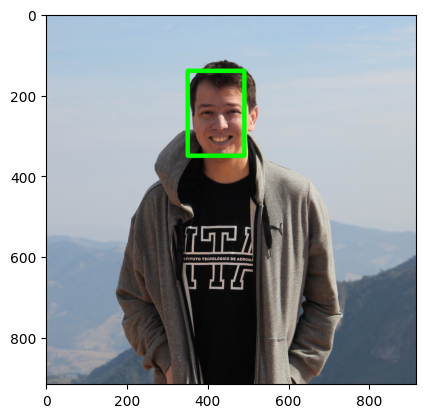

In [13]:
# criando uma cópia
img_cp = img.copy()

# imagem, ponto de inicio, ponto de termino, cor do retangulo, grossura
cv2.rectangle(img_cp, (350, 140), (490, 350), (0, 255, 0), 10)

plt.imshow(img_cp[...,::-1]);

### 1.4.4 - Inserindo Texto

Por fim, vamos escrever em cima da imagem. Isso seria útil, novamente, em um projeto que identifique pessoas ou objetos, por exemplo.

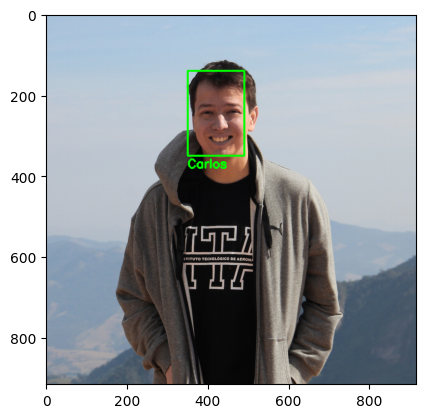

In [15]:
# fazer copia da imagem
img_cp = img.copy()

# desenhar retangulo
cv2.rectangle(img_cp, (350, 140), (490, 350), (0, 255, 0), 3)

# colocar texto por cima
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_cp, 'Carlos', (350, 380), font, 1, (0, 255, 0), 3)

# plotar
plt.imshow(img_cp[...,::-1]);